# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Autumn 2020
- Instructor: Tom Bihari
- Section: Tuesday/Thursday 9:35AM
- Student Name: Krescens Kok
- Student Email: kok.24@osu.edu
- Student ID: 500278517
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

The scope of this exercise is to perform clustering on three different datasets of different sizes. The objective of this assignment is to understand how to select and evaluate suitable off-the-shelf clustering algortihms based on the characteristics of a dataset and the outcomes you need. The exercise is also done to understand how to tune and evaluate a clustering algorithm to achieve good performance.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [379]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
import timeit
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


small_df = pd.read_csv('/Users/krescenskok/Documents/Semester5/CSE 5243/Homeworks/Homework4/small_Xydf.csv')
large1_df = pd.read_csv('/Users/krescenskok/Documents/Semester5/CSE 5243/Homeworks/Homework4/large1_Xydf.csv')
large2_df = pd.read_csv('/Users/krescenskok/Documents/Semester5/CSE 5243/Homeworks/Homework4/large2_Xydf.csv')

***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [380]:
#separating the clusters 
C0 = small_df[small_df["y"] == 0]
C1 = small_df[small_df["y"] == 1]
C2 = small_df[small_df["y"] == 2]

#Calculate WSS ((X values-centroid for each cluster)^2)
a = sum((C0['X0']-C0['X0'].mean())**2)
b = sum((C0['X1']-C0['X1'].mean())**2)
c = sum((C1['X0']-C1['X0'].mean())**2)
d = sum((C1['X1']-C1['X1'].mean())**2)
e = sum((C2['X0']-C2['X0'].mean())**2)
f = sum((C2['X1']-C2['X1'].mean())**2)
WSS = a+b+c+d+e+f

#Calculate the number of rows in each cluster
row0 = C0.shape[0]
row1 = C1.shape[0]
row2 = C2.shape[0]

#Calculate the means for the small df in each true cluster
mean0 = (small_df['X0']).mean()
mean1 = (small_df['X1']).mean()

#Calculate BSS ((number of points * mean-centroid)^2)
a = row0*(mean0-C0['X0'].mean())**2
b = row0*(mean1-C0['X1'].mean())**2
c = row1*(mean0-C1['X0'].mean())**2
d = row1*(mean1-C1['X1'].mean())**2
e = row2*(mean0-C2['X0'].mean())**2
f = row2*(mean1-C2['X1'].mean())**2
BSS = a+b+c+d+e+f

#SSE is the errors combined
SSE = BSS + WSS

print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)

WSS:  625.1315700468002
BSS:  3986.441329795859
SSE:  4611.572899842659


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

For the each K-means algorithm, I only used one configuration paramater because I needed to specify the K value. 

In [381]:
#Get same results each run
np.random.seed(2)
df = small_df[['X0', 'X1']]

#run Kmeans for 2 clusters
start = timeit.default_timer()
K2 = KMeans(n_clusters = 2).fit(df)
stop = timeit.default_timer()

#add the cluster category to the dataset
mean = K2.cluster_centers_
array = K2.labels_
arr_df = pd.DataFrame(data = array)
df_final = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

#separate the clusters
df_final0 = df_final[df_final[0] == 0]
df_final1 = df_final[df_final[0] == 1]

#calculate WSS
a = sum((df_final0['X0']-(mean[0,0]))**2)
b = sum((df_final0['X1']-(mean[0,1]))**2)
c = sum((df_final1['X0']-(mean[1,0]))**2)
d = sum((df_final1['X1']-(mean[1,1]))**2)

WSS = a+b+c+d

#calculate BSS
a = df_final0.shape[0]*(mean0-(mean[0,0]))**2
b = df_final0.shape[0]*(mean1-(mean[0,1]))**2
c = df_final1.shape[0]*(mean0-(mean[1,0]))**2
d = df_final1.shape[0]*(mean1-(mean[1,1]))**2

BSS = a+b+c+d

#calculate SSE
SSE = BSS + WSS

time = stop - start

In [382]:
print("Algorithm For K = 2: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm For K = 2: 
WSS:  1212.5883972546314
BSS:  3398.984502588027
SSE:  4611.572899842658
Total Time:  0.02657655500115652


In [383]:
#same method as before, but with more clusters
np.random.seed(2)
start = timeit.default_timer()
K3 = KMeans(n_clusters = 3).fit(df)
stop = timeit.default_timer()

mean = K3.cluster_centers_
array = K3.labels_
arr_df = pd.DataFrame(data = array)
df_final_3 = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

#map clusters to be the same as the true clusters
df_final_3[0] = df_final_3[0].replace([0,1,2],[2,0,1])

mean0 = (small_df['X0']).mean()
mean1 = (small_df['X1']).mean()

df_final0 = df_final_3[df_final_3[0] == 0]
df_final1 = df_final_3[df_final_3[0] == 1]
df_final2 = df_final_3[df_final_3[0] == 2]

mean_00 = df_final0['X0'].mean()
mean_01 = df_final0['X1'].mean()
mean_10 = df_final1['X0'].mean()
mean_11 = df_final1['X1'].mean()
mean_20 = df_final2['X0'].mean()
mean_21 = df_final2['X1'].mean()

a = sum((df_final0['X0']-(mean_00))**2)
b = sum((df_final0['X1']-(mean_01))**2)
c = sum((df_final1['X0']-(mean_10))**2)
d = sum((df_final1['X1']-(mean_11))**2)
e = sum((df_final2['X0']-(mean_20))**2)
f = sum((df_final2['X1']-(mean_21))**2)

WSS = a+b+c+d+e+f

df_final0.shape[0]
df_final1.shape[0]
df_final2.shape[0]

a = df_final0.shape[0]*(mean0-(mean_00))**2
b = df_final0.shape[0]*(mean1-(mean_01))**2
c = df_final1.shape[0]*(mean0-(mean_10))**2
d = df_final1.shape[0]*(mean1-(mean_11))**2
e = df_final2.shape[0]*(mean0-(mean_20))**2
f = df_final2.shape[0]*(mean1-(mean_21))**2

BSS = a+b+c+d+e+f
SSE = BSS + WSS

time = stop - start

In [384]:
print("Algorithm For K = 3: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm For K = 3: 
WSS:  616.5037785142408
BSS:  3995.069121328418
SSE:  4611.572899842658
Total Time:  0.03261651699904178


In [385]:
#same method as before, but with more clusters
np.random.seed(2)
start = timeit.default_timer()
K4 = KMeans(n_clusters = 4).fit(df)
stop = timeit.default_timer()

mean = K4.cluster_centers_
array = K4.labels_
arr_df = pd.DataFrame(data = array)
df_final4 = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final4[df_final4[0] == 0]
df_final1 = df_final4[df_final4[0] == 1]
df_final2 = df_final4[df_final4[0] == 2]
df_final3 = df_final4[df_final4[0] == 3]

a = sum((df_final0['X0']-(mean[0,0]))**2)
b = sum((df_final0['X1']-(mean[0,1]))**2)
c = sum((df_final1['X0']-(mean[1,0]))**2)
d = sum((df_final1['X1']-(mean[1,1]))**2)
e = sum((df_final2['X0']-(mean[2,0]))**2)
f = sum((df_final2['X1']-(mean[2,1]))**2)
g = sum((df_final3['X0']-(mean[3,0]))**2)
h = sum((df_final3['X1']-(mean[3,1]))**2)

WSS = a+b+c+d+e+f+g+h

df_final0.shape[0]
df_final1.shape[0]
df_final2.shape[0]
df_final3.shape[0]

a = df_final0.shape[0]*(mean0-(mean[0,0]))**2
b = df_final0.shape[0]*(mean1-(mean[0,1]))**2
c = df_final1.shape[0]*(mean0-(mean[1,0]))**2
d = df_final1.shape[0]*(mean1-(mean[1,1]))**2
e = df_final2.shape[0]*(mean0-(mean[2,0]))**2
f = df_final2.shape[0]*(mean1-(mean[2,1]))**2
g = df_final3.shape[0]*(mean0-(mean[3,0]))**2
h = df_final3.shape[0]*(mean1-(mean[3,1]))**2

BSS = a+b+c+d+e+f+g+h
SSE = BSS + WSS


time = stop - start

In [386]:
print("Algorithm For K = 4: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm For K = 4: 
WSS:  518.9259798147973
BSS:  4092.6469200278625
SSE:  4611.57289984266
Total Time:  0.028801726000892813


***
## Section: 1.3 - For the K=3 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

Below is the scatterplot for the true cluster:

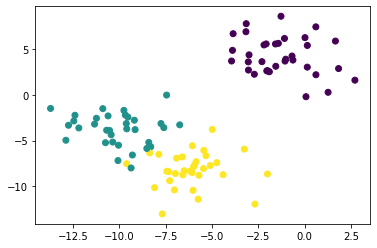

In [387]:
plt.scatter(small_df['X0'], small_df['X1'], c = small_df['y'])

Below is the scatter plot for the clsuter produced by the algorithm:

In [388]:
plt.scatter(df_final_3['X0'], df_final_3['X1'], c = df_final_3[0])

In [389]:
np.random.seed(2)

#use only the cluster numbers for the confusion matrix
actual_y = small_df.iloc[:, 3]
pred_y = df_final_3.iloc[:, 2]

conf_matrix = metrics.confusion_matrix(actual_y, pred_y)

print("Confusion Matrix (going across/down the clusters belong to 0, 1, and 2)")
print(conf_matrix)

Confusion Matrix (going across/down the clusters belong to 0, 1, and 2)
[[34  0  0]
 [ 0 32  1]
 [ 0  0 33]]


In [390]:
print(metrics.classification_report(actual_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.97      0.98        33
           2       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



***
## Section: 1.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

|     | WSS      | BSS       | SSE       |
|-----|----------|-----------|-----------|
| K=2 | 1212.588 | 3398.984  | 4611.5728 |
| K=3 | 616.5037 | 3995.0691 | 4611.5728 |
| K=4 | 518.9259 | 4092.6469 | 4611.5728 |

From these experiments, I observed that as K increased, the WSS got smaller and the BSS got bigger. The BSS getting bigger makes sense because there are more and more clusters, so the between cluster sum of squares will also increase. The total SSE stayed the same value for all 3.

My preferred clustering is K=3 because looking at the confusion matrix and the classification report above, there was only 1 point that was misclassified as cluster 2 when it should've been in cluster 3. The precision, recall and f1-score all have a value that is very close to 1, which is very good for a model, and the accuracy is 99%, which is also very good. Also, looking at the scatterplot graph for K=3, the three clusters are clearly defined. 

Since I don't know the true clusters for K=2 and K=4, I can analyze the scatterplot graphs and the errors. Since the BSS increases, it is evident that making too many clusters will become detrimental, and increase the SSE. We also want to be careful about overfitting. The first graph below is the graph of 2 clusters (K=2). This graph has high bias due to the fact that the points may not be correctly classified, however, it has low variance (this comes from the bias-variance trade off). The second graph below is the graph of 4 clusters (K=4). This graph has high variance and low bias because the graph becomes too flexible (also comes from the bias-variance trade off). In this graph, it is evident that the clusters start to overlap each other, which isn't good. Therefore, I believe that K=3 is the best model for this dataset. 

K=2 Scatterrplot: 


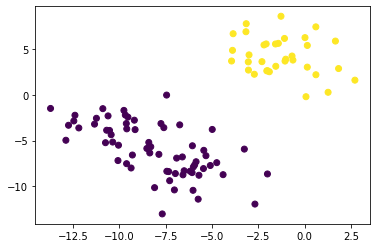

In [391]:
print("K=2 Scatterrplot: ")
plt.scatter(df_final['X0'], df_final['X1'], c = df_final[0])

K=4 Scatterrplot: 


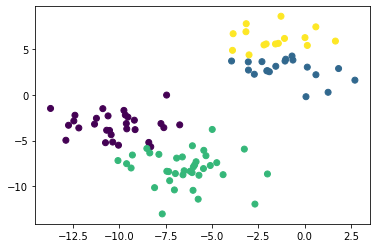

In [392]:
print("K=4 Scatterrplot: ")
plt.scatter(df_final4['X0'], df_final4['X1'], c = df_final4[0])

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [393]:
#separate the clusters
C0 = large1_df[large1_df["y"] == 0]
C1 = large1_df[large1_df["y"] == 1]
C2 = large1_df[large1_df["y"] == 2]
C3 = large1_df[large1_df["y"] == 3]
C4 = large1_df[large1_df["y"] == 4]
C5 = large1_df[large1_df["y"] == 5]
C6 = large1_df[large1_df["y"] == 6]
C7 = large1_df[large1_df["y"] == 7]

#calculate WSS
a = sum((C0['X0']-C0['X0'].mean())**2)
b = sum((C0['X1']-C0['X1'].mean())**2)
c = sum((C1['X0']-C1['X0'].mean())**2)
d = sum((C1['X1']-C1['X1'].mean())**2)
e = sum((C2['X0']-C2['X0'].mean())**2)
f = sum((C2['X1']-C2['X1'].mean())**2)
g = sum((C3['X0']-C3['X0'].mean())**2)
h = sum((C3['X1']-C3['X1'].mean())**2)
i = sum((C4['X0']-C4['X0'].mean())**2)
j = sum((C4['X1']-C4['X1'].mean())**2)
k = sum((C5['X0']-C5['X0'].mean())**2)
l = sum((C5['X1']-C5['X1'].mean())**2)
m = sum((C6['X0']-C6['X0'].mean())**2)
n = sum((C6['X1']-C6['X1'].mean())**2)
o = sum((C7['X0']-C7['X0'].mean())**2)
p = sum((C7['X1']-C7['X1'].mean())**2)
WSS = a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p

#get size of each cluster
row0 = C0.shape[0]
row1 = C1.shape[0]
row2 = C2.shape[0]
row3 = C3.shape[0]
row4 = C4.shape[0]
row5 = C5.shape[0]
row6 = C6.shape[0]
row7 = C7.shape[0]

mean0 = (large1_df['X0']).mean()
mean1 = (large1_df['X1']).mean()

#calculate BSS
a = row0*(mean0-C0['X0'].mean())**2
b = row0*(mean1-C0['X1'].mean())**2
c = row1*(mean0-C1['X0'].mean())**2
d = row1*(mean1-C1['X1'].mean())**2
e = row2*(mean0-C2['X0'].mean())**2
f = row2*(mean1-C2['X1'].mean())**2
g = row3*(mean0-C3['X0'].mean())**2
h = row3*(mean1-C3['X1'].mean())**2
i = row4*(mean0-C4['X0'].mean())**2
j = row4*(mean1-C4['X1'].mean())**2
k = row5*(mean0-C5['X0'].mean())**2
l = row5*(mean1-C5['X1'].mean())**2
m = row6*(mean0-C6['X0'].mean())**2
n = row6*(mean1-C6['X1'].mean())**2
o = row7*(mean0-C7['X0'].mean())**2
p = row7*(mean1-C7['X1'].mean())**2
BSS = a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p

#Calculate SSE
SSE = BSS + WSS

print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)

WSS:  3972.3153879299484
BSS:  67712.28953700385
SSE:  71684.6049249338


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

For the each K-means algorithm, I only used one configuration paramater because I needed to specify the K value. 

In [394]:
#same method as before, but with more clusters
np.random.seed(2)

df = large1_df[['X0', 'X1']]

start = timeit.default_timer()
K6 = KMeans(n_clusters = 6).fit(df)
stop = timeit.default_timer()

mean = K6.cluster_centers_

array = K6.labels_
arr_df = pd.DataFrame(data = array)
df_final6 = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final6[df_final6[0] == 0]
df_final1 = df_final6[df_final6[0] == 1]
df_final2 = df_final6[df_final6[0] == 2]
df_final3 = df_final6[df_final6[0] == 3]
df_final4 = df_final6[df_final6[0] == 4]
df_final5 = df_final6[df_final6[0] == 5]

mean00 = df_final0['X0'].mean()
mean01 = df_final0['X1'].mean()
mean10 = df_final1['X0'].mean()
mean11 = df_final1['X1'].mean()
mean20 = df_final2['X0'].mean()
mean21 = df_final2['X1'].mean()
mean30 = df_final3['X0'].mean()
mean31 = df_final3['X1'].mean()
mean40 = df_final4['X0'].mean()
mean41 = df_final4['X1'].mean()
mean50 = df_final5['X0'].mean()
mean51 = df_final5['X1'].mean()

a = sum((df_final0['X0']-(mean00))**2)
b = sum((df_final0['X1']-(mean01))**2)
c = sum((df_final1['X0']-(mean10))**2)
d = sum((df_final1['X1']-(mean11))**2)
e = sum((df_final2['X0']-(mean20))**2)
f = sum((df_final2['X1']-(mean21))**2)
g = sum((df_final3['X0']-(mean30))**2)
h = sum((df_final3['X1']-(mean31))**2)
i = sum((df_final4['X0']-(mean40))**2)
j = sum((df_final4['X1']-(mean41))**2)
k = sum((df_final5['X0']-(mean50))**2)
l = sum((df_final5['X1']-(mean51))**2)

WSS = a+b+c+d+e+f+g+h+i+j+k+l

df_final0.shape[0]
df_final1.shape[0]
df_final2.shape[0]
df_final3.shape[0]
df_final4.shape[0]
df_final5.shape[0]

a = df_final0.shape[0]*(mean0-(mean00))**2
b = df_final0.shape[0]*(mean1-(mean01))**2
c = df_final1.shape[0]*(mean0-(mean10))**2
d = df_final1.shape[0]*(mean1-(mean11))**2
e = df_final2.shape[0]*(mean0-(mean20))**2
f = df_final2.shape[0]*(mean1-(mean21))**2
g = df_final3.shape[0]*(mean0-(mean30))**2
h = df_final3.shape[0]*(mean1-(mean31))**2
i = df_final4.shape[0]*(mean0-(mean40))**2
j = df_final4.shape[0]*(mean1-(mean41))**2
k = df_final5.shape[0]*(mean0-(mean50))**2
l = df_final5.shape[0]*(mean1-(mean51))**2

BSS = a+b+c+d+e+f+g+h+i+j+k+l
SSE = BSS + WSS

time = stop - start

In [395]:
print("Algorithm for K=6: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for K=6: 
WSS:  5606.631019584987
BSS:  66077.9739053488
SSE:  71684.60492493378
Total Time:  0.08419961000072362


In [396]:
#same method as before, but with more clusters

np.random.seed(2)

df = large1_df[['X0', 'X1']]

start = timeit.default_timer()
K8 = KMeans(n_clusters = 8).fit(df)
stop = timeit.default_timer()

mean = K8.cluster_centers_

array = K8.labels_
arr_df = pd.DataFrame(data = array)
df_final_8 = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

mean0 = (large1_df['X0']).mean()
mean1 = (large1_df['X1']).mean()

#map the cluster values to be the same as the true clusters
df_final_8[0] = df_final_8[0].replace([7,4,6,2,3,0,5],[0,2,3,4,5,6,7])

df_final0 = df_final_8[df_final_8[0] == 0]
df_final1 = df_final_8[df_final_8[0] == 1]
df_final2 = df_final_8[df_final_8[0] == 2]
df_final3 = df_final_8[df_final_8[0] == 3]
df_final4 = df_final_8[df_final_8[0] == 4]
df_final5 = df_final_8[df_final_8[0] == 5]
df_final6 = df_final_8[df_final_8[0] == 6]
df_final7 = df_final_8[df_final_8[0] == 7]

mean00 = df_final0['X0'].mean()
mean01 = df_final0['X1'].mean()
mean10 = df_final1['X0'].mean()
mean11 = df_final1['X1'].mean()
mean20 = df_final2['X0'].mean()
mean21 = df_final2['X1'].mean()
mean30 = df_final3['X0'].mean()
mean31 = df_final3['X1'].mean()
mean40 = df_final4['X0'].mean()
mean41 = df_final4['X1'].mean()
mean50 = df_final5['X0'].mean()
mean51 = df_final5['X1'].mean()
mean60 = df_final6['X0'].mean()
mean61 = df_final6['X1'].mean()
mean70 = df_final7['X0'].mean()
mean71 = df_final7['X1'].mean()


a = sum((df_final0['X0']-(mean00))**2)
b = sum((df_final0['X1']-(mean01))**2)
c = sum((df_final1['X0']-(mean10))**2)
d = sum((df_final1['X1']-(mean11))**2)
e = sum((df_final2['X0']-(mean20))**2)
f = sum((df_final2['X1']-(mean21))**2)
g = sum((df_final3['X0']-(mean30))**2)
h = sum((df_final3['X1']-(mean31))**2)
i = sum((df_final4['X0']-(mean40))**2)
j = sum((df_final4['X1']-(mean41))**2)
k = sum((df_final5['X0']-(mean50))**2)
l = sum((df_final5['X1']-(mean51))**2)
m = sum((df_final6['X0']-(mean60))**2)
n = sum((df_final6['X1']-(mean61))**2)
o = sum((df_final7['X0']-(mean70))**2)
p = sum((df_final7['X1']-(mean71))**2)

WSS = a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p

df_final0.shape[0]
df_final1.shape[0]
df_final2.shape[0]
df_final3.shape[0]
df_final4.shape[0]
df_final5.shape[0]
df_final6.shape[0]
df_final7.shape[0]

a = df_final0.shape[0]*(mean0-(mean00))**2
b = df_final0.shape[0]*(mean1-(mean01))**2
c = df_final1.shape[0]*(mean0-(mean10))**2
d = df_final1.shape[0]*(mean1-(mean11))**2
e = df_final2.shape[0]*(mean0-(mean20))**2
f = df_final2.shape[0]*(mean1-(mean21))**2
g = df_final3.shape[0]*(mean0-(mean30))**2
h = df_final3.shape[0]*(mean1-(mean31))**2
i = df_final4.shape[0]*(mean0-(mean40))**2
j = df_final4.shape[0]*(mean1-(mean41))**2
k = df_final5.shape[0]*(mean0-(mean50))**2
l = df_final5.shape[0]*(mean1-(mean51))**2
m = df_final6.shape[0]*(mean0-(mean60))**2
n = df_final6.shape[0]*(mean1-(mean61))**2
o = df_final7.shape[0]*(mean0-(mean70))**2
p = df_final7.shape[0]*(mean1-(mean71))**2

BSS = a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p
SSE = BSS + WSS

print(mean)
time = stop - start

[[-5.94870046  7.60404358]
 [-9.89362147 -3.94160599]
 [-2.10450791  0.63678044]
 [-1.72249806  3.21530475]
 [-6.97862657 -8.10208833]
 [-9.43716684  3.34601033]
 [-6.21023251 -3.16504262]
 [-1.54676128  4.92098447]]


In [397]:
print("Algorithm for K=8: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for K=8: 
WSS:  3549.109579815017
BSS:  68135.49534511879
SSE:  71684.60492493381
Total Time:  0.08680834199913079


In [398]:
#same method as before, but with more clusters

np.random.seed(2)

df = large1_df[['X0', 'X1']]

start = timeit.default_timer()
K10 = KMeans(n_clusters = 10).fit(df)
stop = timeit.default_timer()

mean = K10.cluster_centers_

array = K10.labels_
arr_df = pd.DataFrame(data = array)
df_final10 = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final10[df_final10[0] == 0]
df_final1 = df_final10[df_final10[0] == 1]
df_final2 = df_final10[df_final10[0] == 2]
df_final3 = df_final10[df_final10[0] == 3]
df_final4 = df_final10[df_final10[0] == 4]
df_final5 = df_final10[df_final10[0] == 5]
df_final6 = df_final10[df_final10[0] == 6]
df_final7 = df_final10[df_final10[0] == 7]
df_final8 = df_final10[df_final10[0] == 8]
df_final9 = df_final10[df_final10[0] == 9]

mean00 = df_final0['X0'].mean()
mean01 = df_final0['X1'].mean()
mean10 = df_final1['X0'].mean()
mean11 = df_final1['X1'].mean()
mean20 = df_final2['X0'].mean()
mean21 = df_final2['X1'].mean()
mean30 = df_final3['X0'].mean()
mean31 = df_final3['X1'].mean()
mean40 = df_final4['X0'].mean()
mean41 = df_final4['X1'].mean()
mean50 = df_final5['X0'].mean()
mean51 = df_final5['X1'].mean()
mean60 = df_final6['X0'].mean()
mean61 = df_final6['X1'].mean()
mean70 = df_final7['X0'].mean()
mean71 = df_final7['X1'].mean()
mean80 = df_final8['X0'].mean()
mean81 = df_final8['X1'].mean()
mean90 = df_final9['X0'].mean()
mean91 = df_final9['X1'].mean()

a = sum((df_final0['X0']-(mean00))**2)
b = sum((df_final0['X1']-(mean01))**2)
c = sum((df_final1['X0']-(mean10))**2)
d = sum((df_final1['X1']-(mean11))**2)
e = sum((df_final2['X0']-(mean20))**2)
f = sum((df_final2['X1']-(mean21))**2)
g = sum((df_final3['X0']-(mean30))**2)
h = sum((df_final3['X1']-(mean31))**2)
i = sum((df_final4['X0']-(mean40))**2)
j = sum((df_final4['X1']-(mean41))**2)
k = sum((df_final5['X0']-(mean50))**2)
l = sum((df_final5['X1']-(mean51))**2)
m = sum((df_final6['X0']-(mean60))**2)
n = sum((df_final6['X1']-(mean61))**2)
o = sum((df_final7['X0']-(mean70))**2)
p = sum((df_final7['X1']-(mean71))**2)
q = sum((df_final8['X0']-(mean80))**2)
r = sum((df_final8['X1']-(mean81))**2)
s = sum((df_final9['X0']-(mean90))**2)
t = sum((df_final9['X1']-(mean91))**2)

WSS = a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p+q+r+s+t

df_final0.shape[0]
df_final1.shape[0]
df_final2.shape[0]
df_final3.shape[0]
df_final4.shape[0]
df_final5.shape[0]
df_final6.shape[0]
df_final7.shape[0]
df_final8.shape[0]
df_final9.shape[0]

mean0 = (large1_df['X0']).mean()
mean1 = (large1_df['X1']).mean()

a = df_final0.shape[0]*(mean0-(mean00))**2
b = df_final0.shape[0]*(mean1-(mean01))**2
c = df_final1.shape[0]*(mean0-(mean10))**2
d = df_final1.shape[0]*(mean1-(mean11))**2
e = df_final2.shape[0]*(mean0-(mean20))**2
f = df_final2.shape[0]*(mean1-(mean21))**2
g = df_final3.shape[0]*(mean0-(mean30))**2
h = df_final3.shape[0]*(mean1-(mean31))**2
i = df_final4.shape[0]*(mean0-(mean40))**2
j = df_final4.shape[0]*(mean1-(mean41))**2
k = df_final5.shape[0]*(mean0-(mean50))**2
l = df_final5.shape[0]*(mean1-(mean51))**2
m = df_final6.shape[0]*(mean0-(mean60))**2
n = df_final6.shape[0]*(mean1-(mean61))**2
o = df_final7.shape[0]*(mean0-(mean70))**2
p = df_final7.shape[0]*(mean1-(mean71))**2
q = df_final8.shape[0]*(mean0-(mean80))**2
r = df_final8.shape[0]*(mean1-(mean81))**2
s = df_final9.shape[0]*(mean0-(mean90))**2
t = df_final9.shape[0]*(mean1-(mean91))**2

BSS = a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p+q+r+s+t
SSE = BSS + WSS

time = stop - start

In [399]:
print("Algorithm for K=10: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for K=10: 
WSS:  3169.817720238545
BSS:  68514.78720469524
SSE:  71684.60492493378
Total Time:  0.1851674749996164


***
## Section: 2.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

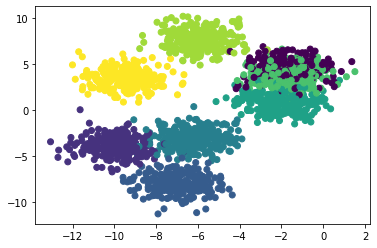

In [400]:
plt.scatter(large1_df['X0'], large1_df['X1'], c = large1_df['y'])

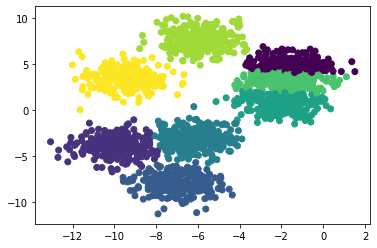

In [401]:
plt.scatter(df_final_8['X0'], df_final_8['X1'], c = df_final_8[0])

In [402]:
#get cluster numbers for confusion matrix
np.random.seed(2)
actual_y = large1_df.iloc[:, 3]
pred_y = df_final_8.iloc[:, 2]

conf_matrix = metrics.confusion_matrix(actual_y, pred_y)

print("Confusion Matrix (going across/down the clusters belong to 0, 1,...,7)")
print(conf_matrix)

Confusion Matrix (going across/down the clusters belong to 0, 1,...,7)
[[164   0   0   0   1  84   1   0]
 [  0 247   0   2   0   0   0   1]
 [  0   1 246   3   0   0   0   0]
 [  0  12   0 237   1   0   0   0]
 [  1   0   0   0 229  20   0   0]
 [ 89   0   0   0   7 154   0   0]
 [  1   0   0   0   0   0 249   0]
 [  0   0   0   0   0   0   1 249]]


In [403]:
print(metrics.classification_report(actual_y, pred_y))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       250
           1       0.95      0.99      0.97       250
           2       1.00      0.98      0.99       250
           3       0.98      0.95      0.96       250
           4       0.96      0.92      0.94       250
           5       0.60      0.62      0.61       250
           6       0.99      1.00      0.99       250
           7       1.00      1.00      1.00       250

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



***
## Section: 2.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

|      | WSS        | BSS         | SSE         |
|------|------------|-------------|-------------|
| K=6  | 5606.631   | 66077.9739  | 71684.6049  |
| K=8  | 3549.109   | 68135.495   | 71684.6049  |
| K=10 | 3169.8177  | 68514.7872  | 71684.6049  |

Scatterplot for K=10

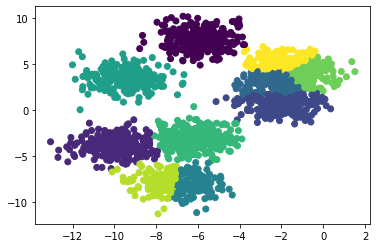

In [404]:
plt.scatter(df_final10['X0'], df_final10['X1'], c = df_final10[0])

From these experiements, I observed the same thing as the first dataset. As the value of K increases, the BSS increases, but the WSS decreases. As mentioned above, this makes sense because the more clusters there are, the smaller the within cluster sum of squares becomes since the points are closer to the centroid for each cluster. The BSS increasing also makes sense because there are more cluster, so the error will increase. Overall, the SSE stayed the same value for all three algorithms.

My preferred clustering is K=8 for a couple reasons: Looking at the confusion matrix, the algorithm accurately predicted a lot of correct clusters in the dataset. To get a better idea, looking at the precision, recall, and f-score, the values are all pretty high, with an overall accuracy of 89% which is pretty good. Looking at the scatterplot, it is clear to see the 8 different clusters, where they are spaced well and none of them are overlapping the other. This indicates that the clusters are identified pretty accurately. 

Since I do not know the true values for K=6 and K=10, I can make a conclusion from the errors from each algorithm. By looking at the BSS and WSS, the BSS is the smallest for K=6 and the WSS is quite high and we want a high BSS and low WSS. This indicates that points may not be classified correctly since the within sum of squares is high, showing that the points within the clusters have a high error, and could possibly belong to an additional cluster. With K=10, the WSS is a small value, however, it makes sense because there are so many clusters, so it is more meaningful to look at the BSS. Although the WSS is small and the BSS is high for K=10, there could be overfitting. By looking at the scatterplot above, it shows the clusters squished together, instead of being in clumps. Therefore, K=8 has good values for the errors, and should be the preferred algorithm.

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [405]:
#separate the clusters
C0 = large2_df[large2_df["y"] == 0]
C1 = large2_df[large2_df["y"] == 1]

#calculate WSS
a = sum((C0['X0']-C0['X0'].mean())**2)
b = sum((C0['X1']-C0['X1'].mean())**2)
c = sum((C1['X0']-C1['X0'].mean())**2)
d = sum((C1['X1']-C1['X1'].mean())**2)
WSS = a+b+c+d

#get size of each cluster
row0 = C0.shape[0]
row1 = C1.shape[0]

mean0 = (large2_df['X0']).mean()
mean1 = (large2_df['X1']).mean()

#calculate BSS
a = row0*(mean0-C0['X0'].mean())**2
b = row0*(mean1-C0['X1'].mean())**2
c = row1*(mean0-C1['X0'].mean())**2
d = row1*(mean1-C1['X1'].mean())**2

BSS = a+b+c+d

SSE = BSS + WSS

print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)

WSS:  1277.6161624690665
BSS:  801.5364401177087
SSE:  2079.152602586775


***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

In [406]:
#same method as before
np.random.seed(2)
df = large2_df[['X0', 'X1']]

start = timeit.default_timer()
K2 = KMeans(n_clusters = 2).fit(df)
stop = timeit.default_timer()

mean = K2.cluster_centers_
array = K2.labels_
arr_df = pd.DataFrame(data = array)
df_final_2 = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final_2[df_final_2[0] == 0]
df_final1 = df_final_2[df_final_2[0] == 1]

a = sum((df_final0['X0']-(mean[0,0]))**2)
b = sum((df_final0['X1']-(mean[0,1]))**2)
c = sum((df_final1['X0']-(mean[1,0]))**2)
d = sum((df_final1['X1']-(mean[1,1]))**2)

WSS = a+b+c+d

a = df_final0.shape[0]*(mean0-(mean[0,0]))**2
b = df_final0.shape[0]*(mean1-(mean[0,1]))**2
c = df_final1.shape[0]*(mean0-(mean[1,0]))**2
d = df_final1.shape[0]*(mean1-(mean[1,1]))**2

BSS = a+b+c+d
SSE = BSS + WSS

time = stop - start

In [407]:
print("Algorithm for K=2: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for K=2: 
WSS:  865.0036926077117
BSS:  1214.113043156032
SSE:  2079.1167357637437
Total Time:  0.09896390999892901


In [408]:
#same method as before
np.random.seed(2)
start = timeit.default_timer()
K3 = KMeans(n_clusters = 3).fit(df)
stop = timeit.default_timer()

mean = K3.cluster_centers_
array = K3.labels_
arr_df = pd.DataFrame(data = array)
df_final_3 = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final_3[df_final_3[0] == 0]
df_final1 = df_final_3[df_final_3[0] == 1]
df_final2 = df_final_3[df_final_3[0] == 2]

mean_00 = df_final0['X0'].mean()
mean_01 = df_final0['X1'].mean()
mean_10 = df_final1['X0'].mean()
mean_11 = df_final1['X1'].mean()
mean_20 = df_final2['X0'].mean()
mean_21 = df_final2['X1'].mean()

a = sum((df_final0['X0']-(mean_00))**2)
b = sum((df_final0['X1']-(mean_01))**2)
c = sum((df_final1['X0']-(mean_10))**2)
d = sum((df_final1['X1']-(mean_11))**2)
e = sum((df_final2['X0']-(mean_20))**2)
f = sum((df_final2['X1']-(mean_21))**2)


WSS = a+b+c+d+e+f

a = df_final0.shape[0]*(mean0-(mean[0,0]))**2
b = df_final0.shape[0]*(mean1-(mean[0,1]))**2
c = df_final1.shape[0]*(mean0-(mean[1,0]))**2
d = df_final1.shape[0]*(mean1-(mean[1,1]))**2
e = df_final2.shape[0]*(mean0-(mean[2,0]))**2
f = df_final2.shape[0]*(mean1-(mean[2,1]))**2

BSS = a+b+c+d+e+f
SSE = BSS + WSS


time = stop - start

In [409]:
print("Algorithm for K=3: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for K=3: 
WSS:  590.2993140942094
BSS:  1489.4218727540879
SSE:  2079.7211868482973
Total Time:  0.13582695900004182


In [410]:
#same method as before
np.random.seed(2)
start = timeit.default_timer()
K4 = KMeans(n_clusters = 4).fit(df)
stop = timeit.default_timer()

mean = K4.cluster_centers_
array = K4.labels_
arr_df = pd.DataFrame(data = array)
df_final4 = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final4[df_final4[0] == 0]
df_final1 = df_final4[df_final4[0] == 1]
df_final2 = df_final4[df_final4[0] == 2]
df_final3 = df_final4[df_final4[0] == 3]

a = sum((df_final0['X0']-(mean[0,0]))**2)
b = sum((df_final0['X1']-(mean[0,1]))**2)
c = sum((df_final1['X0']-(mean[1,0]))**2)
d = sum((df_final1['X1']-(mean[1,1]))**2)
e = sum((df_final2['X0']-(mean[2,0]))**2)
f = sum((df_final2['X1']-(mean[2,1]))**2)
g = sum((df_final3['X0']-(mean[3,0]))**2)
h = sum((df_final3['X1']-(mean[3,1]))**2)

WSS = a+b+c+d+e+f+g+h

a = df_final0.shape[0]*(mean0-(mean[0,0]))**2
b = df_final0.shape[0]*(mean1-(mean[0,1]))**2
c = df_final1.shape[0]*(mean0-(mean[1,0]))**2
d = df_final1.shape[0]*(mean1-(mean[1,1]))**2
e = df_final2.shape[0]*(mean0-(mean[2,0]))**2
f = df_final2.shape[0]*(mean1-(mean[2,1]))**2
g = df_final3.shape[0]*(mean0-(mean[3,0]))**2
h = df_final3.shape[0]*(mean1-(mean[3,1]))**2

BSS = a+b+c+d+e+f+g+h
SSE = BSS + WSS


time = stop - start

In [411]:
print("Algorithm for K=4: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for K=4: 
WSS:  392.6730104505293
BSS:  1685.2264796117227
SSE:  2077.899490062252
Total Time:  0.08801472999948601


***
## Section: 3.3 - For the K=2 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

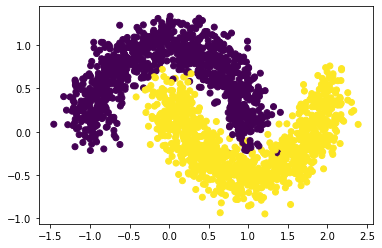

In [412]:
plt.scatter(large2_df['X0'], large2_df['X1'], c = large2_df['y'])

In [413]:
plt.scatter(df_final4['X0'], df_final4['X1'], c = df_final4[0])

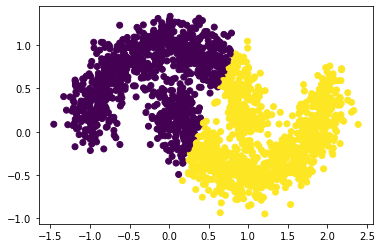

In [414]:
plt.scatter(df_final_2['X0'], df_final_2['X1'], c = df_final_2[0])

In [415]:
#get cluster numbers for confusion matrix
np.random.seed(2)

actual_y = large2_df.iloc[:, 3]
pred_y = df_final_2.iloc[:, 2]

conf_matrix = metrics.confusion_matrix(actual_y, pred_y)

print("Confusion Matrix (going across/down the clusters belong to 0 and 1)")
print(conf_matrix)

Confusion Matrix (going across/down the clusters belong to 0 and 1)
[[758 242]
 [234 766]]


In [416]:
print(metrics.classification_report(actual_y, pred_y))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.76      0.77      0.76      1000

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



***
## Section: 3.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

|     | WSS      | BSS       | SSE       |
|-----|----------|-----------|-----------|
| K=2 | 865.0036 | 1214.113  | 2079.1167 |
| K=3 | 590.299  | 1489.421  | 2079.7211 |
| K=4 | 392.673  | 1685.2264 | 2077.899  |

As stated before, I'm observing the same thing as the previous datasets. As the value of K increases, the WSS decreases and the BSS increases, while the SSE stays around the same. 

Given that we know the true clustering is K=2, I would prefer K=2. However, if we don't know the number of true clusters, my preferred clustering would be K=4 because it has smallest WSS and SSE. Since the WSS for K=2 has such a high WSS, it seems unlikely that the dataset has only 2 clusters since the points from the centroid are so far away. Looking at the confusion matrix, there are many points that are misclassified in the wrong cluster, which makes me believe that more clusters should be used. Analyzing the precision, recall and f-scores, the values are pretty high, however, the accuracy is only 76%, which is lower than the previous datasets. For K=3, the values are decent for the WSS and the BSS is slightly lower than the BSS for K=4, however, the WSS isn't as low as the WSS for K=4, which could mean that there aren't enough clusters. Since K=4 has a small WSS value and a high BSS value, it seems probable that having four clusters is good since we want the WSS to be low (means that the cluster points are close to the centroid) and the BSS to be high (means that the clusters aren't too close to each other). Therefore, I prefer K=4 for the algorithm.

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

I chose DBSCAN for my second clustering algorithm because with this algorithm, it separates clusters of high density from clusters of low density. This algorithm is able to separate clusters of different shapes, and it doesn't require you to know how many clusters there are. The end result tells you how many clusters there should be. DBSCAN also doesn't have to identify all the points from the dataset, so if there are outliers, it will list them as noise.

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

For the first variation of the algorithm, I chose to use the parameters 'eps' and 'min_samples'. 'eps' is important because it is the number of samples in a neighborhood for a point to be considered a core point. 'min_samples' is also important because it identifies the minimum number of points for a cluster to be considered. For the 'eps' value, I chose .07 for the first iteration because the graph shown below starts to curve around that value. For the 'min_samples', generally, 2 times the number of dimensions is used (this was briefly discussed in class), which is why I chose 4.

In [417]:
#code taken from https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
#find the optimal eps value from the graph
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(large2_df[['X0','X1']])
distances, indices = nbrs.kneighbors(large2_df[['X0','X1']])
distances = np.sort(distances, axis=0)
distances = distances[:,3]
plt.plot(distances)

The graph below shows how DBSCAN classified the points from the large2 dataset. The different colors represent the different clusters, but the navy blue dark points represent which points were classified as noise.

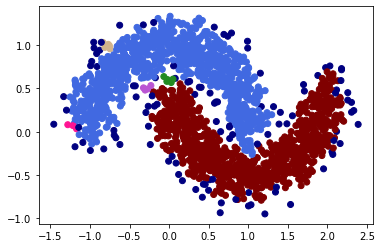

In [418]:
#use the DBSCAN algorithm and map the clusters based on the output of the algorithm
start = timeit.default_timer()
large2 = large2_df[['X0', 'X1']]
start = timeit.default_timer()
clustering = DBSCAN(eps=.07, min_samples=4)
clustering.fit_predict(large2)
stop = timeit.default_timer()

clabel = clustering.labels_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(large2_df['X0'],large2_df['X1'], c=vectorizer(clabel))

In [419]:
#same method as before
array = clabel
arr_df = pd.DataFrame(data = array)
df_final = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final[df_final[0] == 0]
df_final1 = df_final[df_final[0] == 1]
df_final2 = df_final[df_final[0] == 2]
df_final3 = df_final[df_final[0] == 3]
df_final4 = df_final[df_final[0] == 4]
df_final5 = df_final[df_final[0] == 5]

mean0 = (large2_df['X0']).mean()
mean1 = (large2_df['X1']).mean()

mean00 = df_final0['X0'].mean()
mean01 = df_final0['X1'].mean()
mean10 = df_final1['X0'].mean()
mean11 = df_final1['X1'].mean()
mean20 = df_final2['X0'].mean()
mean21 = df_final2['X1'].mean()
mean30 = df_final3['X0'].mean()
mean31 = df_final3['X1'].mean()
mean40 = df_final4['X0'].mean()
mean41 = df_final4['X1'].mean()
mean50 = df_final5['X0'].mean()
mean51 = df_final5['X1'].mean()

a = sum((df_final0['X0']-(mean00))**2)
b = sum((df_final0['X1']-(mean01))**2)
c = sum((df_final1['X0']-(mean10))**2)
d = sum((df_final1['X1']-(mean11))**2)
e = sum((df_final2['X0']-(mean20))**2)
f = sum((df_final2['X1']-(mean21))**2)
g = sum((df_final3['X0']-(mean30))**2)
h = sum((df_final3['X1']-(mean31))**2)
i = sum((df_final4['X0']-(mean40))**2)
j = sum((df_final4['X1']-(mean41))**2)
k = sum((df_final5['X0']-(mean50))**2)
l = sum((df_final5['X1']-(mean51))**2)

WSS = a+b+c+d+e+f+g+h+i+j+k+l
WSS

a = df_final0.shape[0]*(mean0-(mean00))**2
b = df_final0.shape[0]*(mean1-(mean01))**2
c = df_final1.shape[0]*(mean0-(mean10))**2
d = df_final1.shape[0]*(mean1-(mean11))**2
e = df_final2.shape[0]*(mean0-(mean20))**2
f = df_final2.shape[0]*(mean1-(mean21))**2
g = df_final3.shape[0]*(mean0-(mean30))**2
h = df_final3.shape[0]*(mean1-(mean31))**2
i = df_final4.shape[0]*(mean0-(mean40))**2
j = df_final4.shape[0]*(mean1-(mean41))**2
k = df_final5.shape[0]*(mean0-(mean50))**2
l = df_final5.shape[0]*(mean1-(mean51))**2

BSS = a+b+c+d+e+f+g+h+i+j+k+l
BSS
SSE = BSS + WSS
time = stop-start

In [420]:
print("Algorithm for min_sample = 4: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for min_sample = 4: 
WSS:  1134.3575250189874
BSS:  785.1067739310524
SSE:  1919.4642989500398
Total Time:  0.17123983000055887


Looking at the confusion matrix below, we can ignore the first column and the first row because of the points that were classified as noise points. 

In [421]:
np.random.seed(2)
#get cluster values for confusion matrix
actual_y = large2_df.iloc[:, 3]
pred_y = df_final.iloc[:, 2]

conf_matrix = metrics.confusion_matrix(actual_y, pred_y)

print("Confusion Matrix (going across/down the clusters belong to 0,1,...,5)")
print(conf_matrix)

Confusion Matrix (going across/down the clusters belong to 0,1,...,5)
[[  0   0   0   0   0   0   0]
 [ 47 940   3   1   1   5   3]
 [ 63  10 920   4   3   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


In [422]:
print(metrics.classification_report(actual_y, pred_y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.99      0.94      0.96      1000
           1       1.00      0.92      0.96      1000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.93      2000
   macro avg       0.28      0.27      0.27      2000
weighted avg       0.99      0.93      0.96      2000



For the second variation of the algorithm, I chose to also use the parameters 'eps' and 'min_samples' for the same reasons that were mentioned above. For the 'eps' value, I chose .07 for the second iteration as well because the graph shown below starts to curve around that value. For the 'min_samples', I found from "https://www.sciencedirect.com/science/article/pii/S0169023X06000218" that ln(n) is another good way to find the number of min_samples. There are 2000 points in the large2 dataset, so ln(2000) = 7.6, which is what I used for my min_samples value.

The graph below shows how DBSCAN classified the points from the large2 dataset. The different colors represent the different clusters, but the navy blue dark points represent which points were classified as noise.

In [423]:
#use DBSCAN and plot based on the clusters
large2 = large2_df[['X0', 'X1']]
start = timeit.default_timer()
clustering = DBSCAN(eps=.07, min_samples=7.6)
clustering.fit_predict(large2)
stop = timeit.default_timer()

clabel = clustering.labels_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(large2_df['X0'],large2_df['X1'], c=vectorizer(clabel))

In [424]:
#same method as before
array = clabel
arr_df = pd.DataFrame(data = array)
df_final = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final[df_final[0] == 0]
df_final1 = df_final[df_final[0] == 1]
df_final2 = df_final[df_final[0] == 2]
df_final3 = df_final[df_final[0] == 3]
df_final4 = df_final[df_final[0] == 4]
df_final5 = df_final[df_final[0] == 5]
df_final6 = df_final[df_final[0] == 6]

mean0 = (large2_df['X0']).mean()
mean1 = (large2_df['X1']).mean()

mean00 = df_final0['X0'].mean()
mean01 = df_final0['X1'].mean()
mean10 = df_final1['X0'].mean()
mean11 = df_final1['X1'].mean()
mean20 = df_final2['X0'].mean()
mean21 = df_final2['X1'].mean()
mean30 = df_final3['X0'].mean()
mean31 = df_final3['X1'].mean()
mean40 = df_final4['X0'].mean()
mean41 = df_final4['X1'].mean()
mean50 = df_final5['X0'].mean()
mean51 = df_final5['X1'].mean()
mean60 = df_final6['X0'].mean()
mean61 = df_final6['X1'].mean()

a = sum((df_final0['X0']-(mean00))**2)
b = sum((df_final0['X1']-(mean01))**2)
c = sum((df_final1['X0']-(mean10))**2)
d = sum((df_final1['X1']-(mean11))**2)
e = sum((df_final2['X0']-(mean20))**2)
f = sum((df_final2['X1']-(mean21))**2)
g = sum((df_final3['X0']-(mean30))**2)
h = sum((df_final3['X1']-(mean31))**2)
i = sum((df_final4['X0']-(mean40))**2)
j = sum((df_final4['X1']-(mean41))**2)
k = sum((df_final5['X0']-(mean50))**2)
l = sum((df_final5['X1']-(mean51))**2)
m = sum((df_final6['X0']-(mean60))**2)
n = sum((df_final6['X1']-(mean61))**2)

WSS = a+b+c+d+e+f+g+h+i+j+k+l+m+n
WSS

a = df_final0.shape[0]*(mean0-(mean00))**2
b = df_final0.shape[0]*(mean1-(mean01))**2
c = df_final1.shape[0]*(mean0-(mean10))**2
d = df_final1.shape[0]*(mean1-(mean11))**2
e = df_final2.shape[0]*(mean0-(mean20))**2
f = df_final2.shape[0]*(mean1-(mean21))**2
g = df_final3.shape[0]*(mean0-(mean30))**2
h = df_final3.shape[0]*(mean1-(mean31))**2
i = df_final4.shape[0]*(mean0-(mean40))**2
j = df_final4.shape[0]*(mean1-(mean41))**2
k = df_final5.shape[0]*(mean0-(mean50))**2
l = df_final5.shape[0]*(mean1-(mean51))**2
m = df_final6.shape[0]*(mean0-(mean60))**2
n = df_final6.shape[0]*(mean1-(mean61))**2

BSS = a+b+c+d+e+f+g+h+i+j+k+l+m+n
BSS
SSE = BSS + WSS
time = stop-start

In [425]:
print("Algorithm for min_sample = 7.6: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for min_sample = 7.6: 
WSS:  838.1300622202438
BSS:  832.8408135773
SSE:  1670.9708757975436
Total Time:  0.02383488199848216


Looking at the confusion matrix below, again, we can ignore the first column and the first row because of the points that were classified as noise points. 

In [426]:
np.random.seed(2)
#get cluster numbers for confusion matrix
actual_y = large2_df.iloc[:, 3]
pred_y = df_final.iloc[:, 2]

conf_matrix = metrics.confusion_matrix(actual_y, pred_y)

print("Confusion Matrix (going across/down the clusters belong to 0,1,...,5)")
print(conf_matrix)

Confusion Matrix (going across/down the clusters belong to 0,1,...,5)
[[  0   0   0   0   0   0   0   0]
 [161 737   2  87   8   0   5   0]
 [172   0 812   1   0   9   0   6]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [427]:
print(metrics.classification_report(actual_y, pred_y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.74      0.85      1000
           1       1.00      0.81      0.90      1000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.77      2000
   macro avg       0.25      0.19      0.22      2000
weighted avg       1.00      0.77      0.87      2000



Shown below is the true scatterplot for the large2 dataset

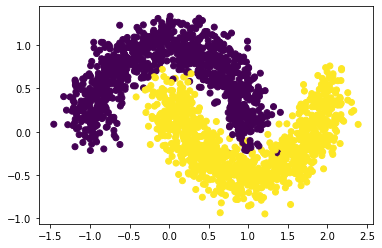

In [428]:
plt.scatter(large2_df['X0'], large2_df['X1'], c = large2_df['y'])

***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

|                  | WSS     | BSS      | SSE      |
|------------------|---------|----------|----------|
| min_sample = 4   | 1134.35 | 785.1067 | 1919.464 |
| min_sample = 7.6 | 838.130 | 832.8408 | 1670.970 |

For the first algorithm, with eps=.07 and min_sample=4, the algorithm determined that there were 6 clusters total, with a total of 110 noise points. For the second algorithm, with eps=.07 and min_sample=7.6, the algorithm determined that there were 7 clusters total, with a total of 333 noise points. Analyzing the error values, the WSS stayed the same (with a very small difference), the BSS for the second algorithm increased, also increasing the SSE. It makes sense that the BSS increased because the number of clusters also increased. 

Looking at the classification reports, we see that the precision value, recall, and f1-scores are all pretty high for the clusters 0 and 1. The rest of the values are zero, suggesting that they should not be clusters since the actual clusterings for the dataset only consists of 2. The accuracy is fairly high for the first algorithm (noise points do effect this). For the second algorithm, we see lower values for the precision, recall, and f1-score and a smaller accuracy of 77%.

My preferred clustering algorithm is when the min_sample is set to 7.6. The WSS is smaller for this algorithm and the BSS is bigger than the algorithm for min_sample=4. Although the SSE is greater for the second run, the WSS is small, meaning that the cluster points are closer to the centroid, therefore, more likely to belong to that cluster. Since the WSS for min_sample is pretty big, the cluster points aren't close to the centroid, most likely belonging to another cluster.

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

I choose the agglomerative clustering because this algorithm is usually used for datasets where the points are close together. From above, the scatterplot of the large2 dataset showed that all the points were close together, rather than in clear, visible clusters. This algorithm is based on the distance between the points, calculating the similarities, so the dataset needs to be scaled and normalized.

***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

For agglomerative clustering, I set the number of clusters to two and four to validate my thoughts using kmeans. The linkage was set to single, as this type of dataset uses single linkage. 

Scaling and normalizing the dataset:

In [429]:
#Code taken from "https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/"
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 

#scaling and normalizing the dataset
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(large2) 
X_normalized = normalize(X_scaled) 

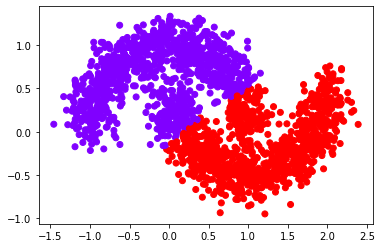

In [430]:
#Code taken from "https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/"
from sklearn.cluster import AgglomerativeClustering

#using agglomerative and plotting based on the clusters
start = timeit.default_timer()
cluster = AgglomerativeClustering(n_clusters = 2, linkage='single') 
stop = timeit.default_timer()
plt.scatter(large2['X0'], large2['X1'], 
           c = cluster.fit_predict(X_normalized), cmap ='rainbow') 
plt.show() 


In [431]:
#same method as before
np.random.seed(2)
array = cluster.labels_
arr_df = pd.DataFrame(data = array)
df_final = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final[df_final[0] == 0]
df_final1 = df_final[df_final[0] == 1]

mean0 = (large2_df['X0']).mean()
mean1 = (large2_df['X1']).mean()

mean_00 = df_final0['X0'].mean()
mean_01 = df_final0['X1'].mean()
mean_10 = df_final1['X0'].mean()
mean_11 = df_final1['X1'].mean()

a = sum((df_final0['X0']-(mean_00))**2)
b = sum((df_final0['X1']-(mean_01))**2)
c = sum((df_final1['X0']-(mean_10))**2)
d = sum((df_final1['X1']-(mean_11))**2)

WSS = a+b+c+d
WSS

a = df_final0.shape[0]*(mean0-(mean_00))**2
b = df_final0.shape[0]*(mean1-(mean_01))**2
c = df_final1.shape[0]*(mean0-(mean_10))**2
d = df_final1.shape[0]*(mean1-(mean_11))**2

BSS = a+b+c+d
BSS
SSE = BSS + WSS
time = stop-start

In [432]:
print("Algorithm for n_clusters = 2: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for n_clusters = 2: 
WSS:  921.060385623792
BSS:  1158.092216962981
SSE:  2079.152602586773
Total Time:  6.940999992366415e-05


In [433]:
np.random.seed(2)
#get clusters for confusion matrix
actual_y = large2_df.iloc[:, 3]
pred_y = df_final.iloc[:, 2]

conf_matrix = metrics.confusion_matrix(actual_y, pred_y)

print("Confusion Matrix (going across/down the clusters belong to 0 and 1)")
print(conf_matrix)

Confusion Matrix (going across/down the clusters belong to 0 and 1)
[[859 141]
 [173 827]]


In [434]:
print(metrics.classification_report(actual_y, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.85      0.83      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



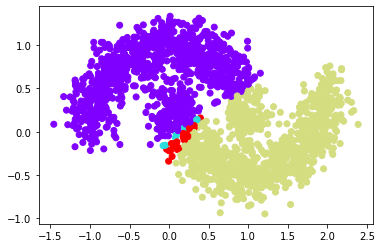

In [435]:
start = timeit.default_timer()
cluster = AgglomerativeClustering(n_clusters = 4, linkage = 'single') 
stop = timeit.default_timer()
plt.scatter(large2['X0'], large2['X1'], 
           c = cluster.fit_predict(X_normalized), cmap ='rainbow') 
plt.show() 

In [436]:
#same method as before
np.random.seed(2)
array = cluster.labels_
arr_df = pd.DataFrame(data = array)
df_final = pd.concat([df.reset_index(drop=True), arr_df], axis = 1)

df_final0 = df_final[df_final[0] == 0]
df_final1 = df_final[df_final[0] == 1]
df_final2 = df_final[df_final[0] == 2]
df_final3 = df_final[df_final[0] == 3]

mean0 = (large2_df['X0']).mean()
mean1 = (large2_df['X1']).mean()

mean_00 = df_final0['X0'].mean()
mean_01 = df_final0['X1'].mean()
mean_10 = df_final1['X0'].mean()
mean_11 = df_final1['X1'].mean()
mean_20 = df_final2['X0'].mean()
mean_21 = df_final2['X1'].mean()
mean_30 = df_final3['X0'].mean()
mean_31 = df_final3['X1'].mean()

a = sum((df_final0['X0']-(mean_00))**2)
b = sum((df_final0['X1']-(mean_01))**2)
c = sum((df_final1['X0']-(mean_10))**2)
d = sum((df_final1['X1']-(mean_11))**2)
e = sum((df_final2['X0']-(mean_20))**2)
f = sum((df_final2['X1']-(mean_21))**2)
g = sum((df_final3['X0']-(mean_30))**2)
h = sum((df_final3['X1']-(mean_31))**2)

WSS = a+b+c+d+e+f+g+h
WSS

a = df_final0.shape[0]*(mean0-(mean_00))**2
b = df_final0.shape[0]*(mean1-(mean_01))**2
c = df_final1.shape[0]*(mean0-(mean_10))**2
d = df_final1.shape[0]*(mean1-(mean_11))**2
e = df_final2.shape[0]*(mean0-(mean_20))**2
f = df_final2.shape[0]*(mean1-(mean_21))**2
g = df_final3.shape[0]*(mean0-(mean_30))**2
h = df_final3.shape[0]*(mean1-(mean_31))**2

BSS = a+b+c+d+e+f+g+h
BSS
SSE = BSS + WSS
time = stop-start

In [437]:
print("Algorithm for n_clusters = 4: ")
print("WSS: ", WSS)
print("BSS: ", BSS)
print("SSE: ", SSE)
print("Total Time: ", time)

Algorithm for n_clusters = 4: 
WSS:  882.711286865822
BSS:  1196.4413157209506
SSE:  2079.1526025867724
Total Time:  0.00033811700086516794


The confusion matrix and classification report doesn't tell us much because we can only compare it to the two clusters that are the true clusterings.

In [438]:
np.random.seed(2)

actual_y = large2_df.iloc[:, 3]
pred_y = df_final.iloc[:, 2]

conf_matrix = metrics.confusion_matrix(actual_y, pred_y)

print("Confusion Matrix (going across/down the clusters belong to 0 and 1)")
print(conf_matrix)

Confusion Matrix (going across/down the clusters belong to 0 and 1)
[[859   0 141   0]
 [164   9 795  32]
 [  0   0   0   0]
 [  0   0   0   0]]


In [439]:
print(metrics.classification_report(actual_y, pred_y))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       1.00      0.01      0.02      1000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.43      2000
   macro avg       0.46      0.22      0.22      2000
weighted avg       0.92      0.43      0.43      2000



Shown below is the true scatterplot for large2 dataset

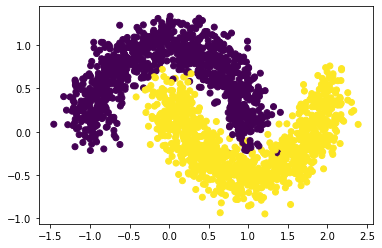

In [440]:
plt.scatter(large2_df['X0'], large2_df['X1'], c = large2_df['y'])

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

|                | WSS      | BSS       | SSE        |
|----------------|----------|-----------|------------|
| n_clusters = 2 | 921.0603 | 1158.0922 | 2079.15260 |
| n_clusters = 4 | 882.7112 | 1196.4413 | 2079.1526  |

From these experiments, I concluded that they produce the same or very similar results as the kmeans algorithm. Both alrogithms for agglomerative clustering produce a SSE value of ~2079. Although they produce very similar values, the scatterplots differ when the number of clusters is equal to four. The agglomerative algorithm categorizes two clusters that are very small, while the kmeans algorithm split the points into roughly four clusters.

My preferred clustering is when n_cluster is equal to two because of the scatterplot differences. Looking at the scatterplot when n_clusters is equal to four, it's hard to believe that two clusters would be very small and right next to each other, overlapping with the other points. It begins to look like the algorithm is overfitting. Although the WSS value is higher and the BSS is smaller for n_clusters=2, overfitting can always occur when the number of clusters start to increase. Therefore, my preferred clustering is when n_clusters=2.

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

**Values are subject to change from different runs of the notebook**

| Algorithm      | Time       |
|----------------|------------|
| K=2            | 0.068362   |
| K=3            | 0.1467264  |
| K=4            | 0.108591   |
| min_sample=4   | 0.018238   |
| min_sample=7.6 | 0.0147050  |
| n_clusters=2   | 0.00015819 |
| n_clusters=4   | 0.00010517 |

Overall, it seems that the agglomerative clustering algorithm had the fastest time to compute with kmeans having the slowest time to compute. There doesn't seem to be a correlation with the performance of the algorith versus the true clustering. Looking at the kmeans (all the K values), the true clustering had the shortest time to compute, however, with the agglomerative algorithm (n_clusters values), the true clustering had the longest time to compute. With DBSCAN (min_sample values), we are unable to compare the true clustering due to the fact that DBSCAN doesn't require a number of clusters before the algorithm begins. 

Some characteristics that might impact the clustering algorithms is how far the points are away from each other in the dataset, because these algorithms have to compute the distances of a point from the centroid and the similarities. If points are very far away, it might take longer to compute the distances. Another thing that could impact the algorithm is the amount of points in the dataset. More points would take longer to classify and find the distances of every point. Lastly, another characteristic that could impact the algorithm is how many clusters that were set before the algorithm ran. If there are more clusters, it is likely that the algorithm will take longer because different centroids must be found for each cluster, along with deciding which point belongs to which cluster.

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

For this specific dataset, I believe that DBSCAN is the best clustering algorithm. I believe this because DBSCAN is able to identify the noise points in a dataset and create clusters based on the algoritm, without having to specify how many clusters there are before it starts. Out of all the algorithms, DBSCAN had the best accuracy of 93% and 77% (from both runs), which shows that it is useful and can be relied on pretty well. With DBSCAN, we are able to predict clusters for datasets that have odd shapes. In this case, the dataset shows two parabolic shapes, where kmeans and agglomerative predcited the clusters to be separated by a diagonal line, whereas DBSCAN was able to identify the two different shapes.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

From this homework assignment, I learned that the SSE for each run for a specific algorithm tends to stay the same, while the BSS and WSS have a trade off. As the numbers of clusters increase, the WSS decreases and the BSS increases. This is because the more clusters there are, the points are closer to the centroid, decreasing the overall WSS value. For the BSS value, since there are more clusters, there are more distances to calculate between the clusters, thus the value will increase. I also learned that there are multiple algorithms that can be used for datasets, but some are better than others, depending on the patterns of the data. DBSCAN tends to be a popular method that is used to find clusters because you do not have to specify how many clusters there are before the algorithm runs. As shown in this homework assignment, DBSCAN did have the better output of clusters and the lower error values. Kmeans and agglomerative clsutering are similar, however, agglomerative focuses on one data point at a time and continues until the number of clusters is found, which was specified before the algorithm ran.

***
### END-OF-SUBMISSION
***